
Link Dataset: https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sleep_cycle_productivity.csv")
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [ ]:
df["Sleep Debt (hrs)"] = 8 - df["Total Sleep Hours"]

In [ ]:
df = df.drop(['Date', 'Gender', 'Age','Screen Time Before Bed (mins)'], axis=1)

In [ ]:
df.head()

,Person_ID,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Sleep Debt (hrs)
0,1860,23.33,4.61,5.28,3,86,87,8.808920,8,3,6,2.72
1,1769,21.02,2.43,5.41,5,32,21,6.329833,10,3,7,2.59
2,2528,22.10,3.45,5.35,7,17,88,8.506306,10,9,10,2.65
3,8041,23.10,6.65,7.55,8,46,34,6.070240,8,4,2,0.45
4,4843,21.42,4.17,6.75,10,61,269,11.374994,8,7,9,1.25


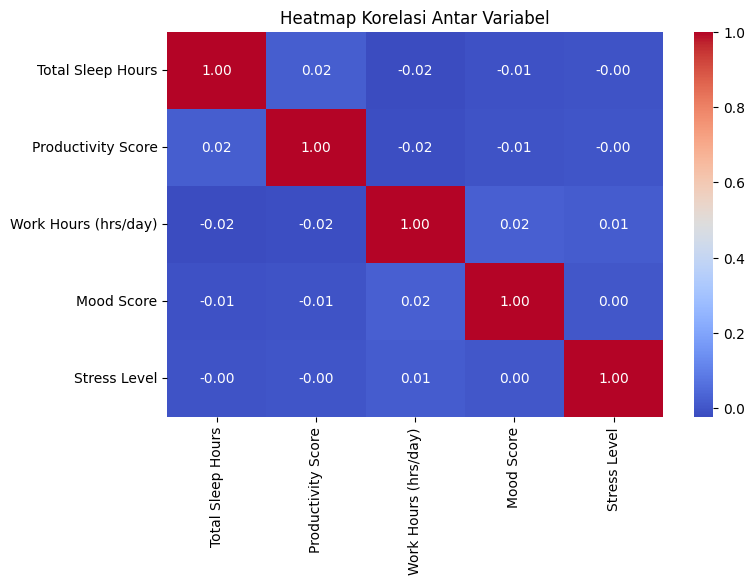

In [26]:
# Heatmap (Seaborn): Korelasi Antar Variabel Numerik
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Total Sleep Hours', 'Productivity Score', 'Work Hours (hrs/day)', 'Mood Score', 'Stress Level']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Semua variabel memiliki korelasi yang sangat rendah (mendekati 0), baik positif maupun negatif.

Karena korelasinya sangat rendah, tindakan yang dapat diambil adalah mengumpulkan lebih banyak data atau memperluas variabel agar menemukan hasil korelasi yang lebih jelas. Selain itu, survei lebih lanjut juga bisa dilakukan untuk mengetahui apakah ada faktor lain yang memengaruhi.

<ipython-input-7-db5f60ce9bd2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_counts.index, y=sleep_counts.values, palette='Oranges')


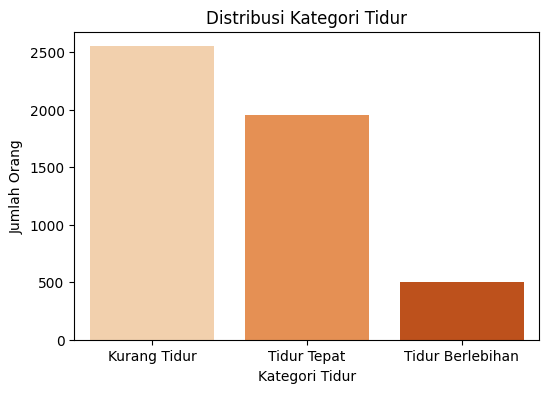

In [ ]:
# Kategorisasi Tidur
def kategori_tidur(x):
    if x < 7:
        return 'Kurang Tidur'
    elif 7 <= x <= 9:
        return 'Tidur Tepat'
    else:
        return 'Tidur Berlebihan'

df['Kategori Tidur'] = df['Total Sleep Hours'].apply(kategori_tidur)

# Hitung jumlah orang di setiap kategori
sleep_counts = df['Kategori Tidur'].value_counts()

# Buat Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(x=sleep_counts.index, y=sleep_counts.values, palette='Oranges')
plt.title('Distribusi Kategori Tidur')
plt.xlabel('Kategori Tidur')
plt.ylabel('Jumlah Orang')
plt.show()

- Kategori "Kurang Tidur" memiliki jumlah paling banyak (sekitar 2500 orang), menunjukkan bahwa sebagian besar responden memiliki waktu tidur yang kurang dari ideal.
- Kategori "Tidur Tepat" berada di urutan kedua (sekitar 1900 orang), menunjukkan masih ada sebagian besar orang yang tidur dalam rentang ideal.
- Kategori "Tidur Berlebihan" memiliki jumlah yang jauh lebih sedikit (sekitar 500 orang)

Tindakan yang bisa dilakukan adalah dengan mengedukasi kepada responden mengenai tidur yang sehat

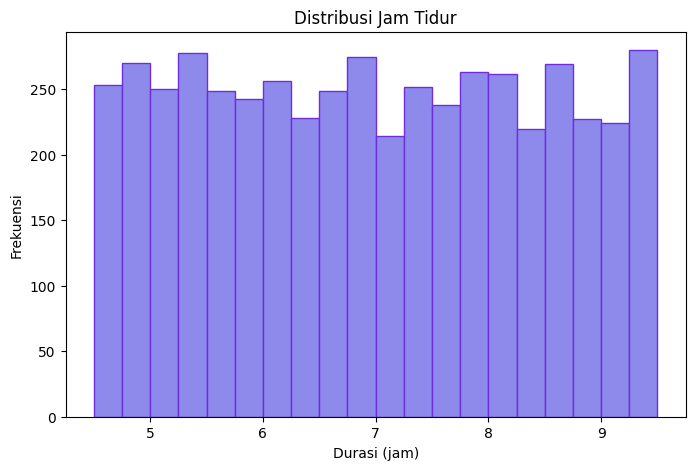

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['Total Sleep Hours'], bins=20, color='#8e8aeb', edgecolor='#6f2de0')
plt.title('Distribusi Jam Tidur')
plt.xlabel('Durasi (jam)')
plt.ylabel('Frekuensi')
plt.show()

- Distribusi jam tidur cukup merata pada rentang 5 hingga 9 jam, dengan frekuensi tertinggi ada pada jam 5, 7, dan 9 jam
- Frekuensi pada setiap durasi terlihat cukup merata, dengan tidak ada perbedaan signifikan antara satu durasi dengan lainnya.

Sama halnya dengan bar distribusi kategori tidur, hal dapat dilakukan adalah dengan mengedukasi kepada responden mengenai tidur yang sehat